Membre du Groupe:<br>
-AIT SOUDANE Yassine<br>
-KOUKI OUSSEMA<br>
-MARIPO Tsivery<br>

# 1- Importation des librairies pour notre test stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels.api
from scipy.stats import pearsonr
from scipy import stats

# 2- Importation et chargement du dataset insurance.csv

In [ ]:
df = pd.read_csv(r'/content/sample_data/insurance.csv')

# 3- Dimension du dataset a etudier

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# 4- Description du Dataset insurance.csv

Le dataframe insurance.csv represente les charges de l'assurance sur une variation des individus.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 5- Test 1: Test d'independance des deux variables qualitatives "sex" et "smoker"

In [ ]:
#Ici nous avons deux var qualitatives : sex et smoker
#le test chi2 est à appliquer
#hypothese null H0: Les deux variables sont indépendantes 
#La methode applicable est Chi2

In [ ]:
contingency=pd.crosstab(df['sex'],df['smoker'])

In [ ]:
#Tableau de contingence

In [ ]:
contingency

smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
contigency_pct = pd.crosstab(df['sex'], df['smoker'], normalize='index')
round((contigency_pct*100),2)

smoker,no,yes
sex,,
female,82.63,17.37
male,76.48,23.52


In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
test_result = chi2_contingency(contingency)
statistic = test_result[0]
p_value = test_result[1]
degree_of_freedom = test_result[2]
frequence_attendu = test_result[3]

In [ ]:
prob = 0.95
critique = chi2.ppf(prob, test_result[2])
if abs(test_result[0]) >= critique:
    print('reject H0')
else:
    print('fail to reject H0')

reject H0


In [ ]:
#Méthode 2
print(p_value)

0.006548143503580696


In [ ]:
#La valeur p_value est inferieur à 5% le risque alpha donc on rejette H0, on peut dire que les deux variables
#sont dépendantes
#Etudions le degré de dépendance avec la methode de V_Cramer

In [ ]:
def V_cramer (contingency,N):
    stat_chi2 = test_result[0]
    k = contingency.shape[0]
    r = contingency.shape[1]
    phi = (stat_chi2/N)
    return np.sqrt(phi/min(k-1, r-1))

V_cramer(contingency, df.shape[0])

0.07433266042279539

In [ ]:
#La valeur V_cramer est  égale à 0.07 proche de 0, donc la dépendance entre les varaibles est faible

In [ ]:
##########################################End Test Chi2#################################################

# 6- Test 2: Test de dependance entre la variable quantitative "children" et la variable qualitative "sex"

In [ ]:
#La variable "sex" contient 2 modalités et alors l'hypothèse null
#H0: les moyennes des 2 modalités sont égales
#H0: u1 = u2 
#La methode applicable est celui de ANOVA

In [ ]:
import statsmodels.api

In [ ]:
result = statsmodels.formula.api.ols('children ~ sex' , data = df).fit()
table_anova = statsmodels.api.stats.anova_lm(result)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,0.572329,0.572329,0.393659,0.53049
Residual,1336.0,1942.373112,1.453872,NaN,NaN


In [ ]:
#La valeur p est supérieure au risque alpha (5%) donc on rejette pas l'hypothèse null
#Les 2 moyennes des 2 modalités  sont  égales et alors
#il n'existe aucune dépendance entre les 2 variables "children" et "sex"

In [ ]:
####################################End Test Anova #############################################################

# 7- Test 3: Test de dependances entre deux variables quantitatives "bmi" et "charges"

In [ ]:
#Les deux variable 'bmi' et 'charges' sont deux variables quantitatives
#Le test de pearson est alors appliqué
#Prenons l'hypothèse nulle: 
#H0: les deux variables sont indépendantes.
#La methode applicable est pearsonr

In [ ]:
from scipy.stats import pearsonr

In [ ]:
rslt = pd.DataFrame(pearsonr(df['bmi'] , df['charges']), index = ['person_coeff' , 'p_value'] , columns = ['results'])
round(rslt,2)

,results
person_coeff,0.2
p_value,0.0


In [ ]:
#La valeur p_value est inférieur au risque alpha (5%) et alors on rejette l'hypothèse null que les deux variables sont independantes
#On peut conclure que les deux variables bmi et charges sont dépendantes
#Avec un lien de dépendance ayant un coefficient de corrélation de 0.2, le degré de dépendance est faible
#Traçons le nuage des points avec la droite de régression

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
slope, intercept, p_value, r_value, std_err = stats.linregress(df['bmi'] , df['charges'])
def Prediction (X):
    return slope * X + intercept
fitline = Prediction (df['bmi'])

Text(0, 0.5, 'charges')

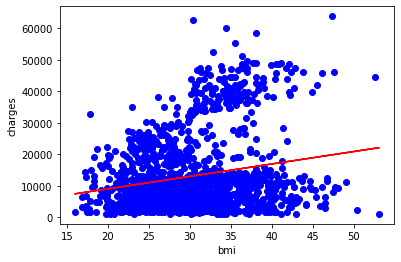

In [ ]:
plt.scatter( df['bmi'] ,df['charges'] , c = 'b')
plt.plot (df['bmi'] , fitline , c = 'r')
plt.xlabel('bmi')
plt.ylabel('charges')

In [ ]:
#Graphiquement on remarque la dispersion des points 
# par rapport à la droite de regression


In [ ]:
#############################################End Test Pearsonr############################################3 